# 1. Data Collection 

In [4]:
#import the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
#glob package is useful for collecting multiple files matching a pattern, such as all CSV files in a directory.
import glob

In [29]:
# using *csv extract all the csv files 
path = r'C:\Users\rocke\Downloads\S&P\individual_stocks_5yr\\'
csv_files = glob.glob(path + '*.csv')
print(csv_files)

['C:\\Users\\rocke\\Downloads\\S&P\\individual_stocks_5yr\\AAL_data.csv', 'C:\\Users\\rocke\\Downloads\\S&P\\individual_stocks_5yr\\AAPL_data.csv', 'C:\\Users\\rocke\\Downloads\\S&P\\individual_stocks_5yr\\AAP_data.csv', 'C:\\Users\\rocke\\Downloads\\S&P\\individual_stocks_5yr\\ABBV_data.csv', 'C:\\Users\\rocke\\Downloads\\S&P\\individual_stocks_5yr\\ABC_data.csv', 'C:\\Users\\rocke\\Downloads\\S&P\\individual_stocks_5yr\\ABT_data.csv', 'C:\\Users\\rocke\\Downloads\\S&P\\individual_stocks_5yr\\ACN_data.csv', 'C:\\Users\\rocke\\Downloads\\S&P\\individual_stocks_5yr\\ADBE_data.csv', 'C:\\Users\\rocke\\Downloads\\S&P\\individual_stocks_5yr\\ADI_data.csv', 'C:\\Users\\rocke\\Downloads\\S&P\\individual_stocks_5yr\\ADM_data.csv', 'C:\\Users\\rocke\\Downloads\\S&P\\individual_stocks_5yr\\ADP_data.csv', 'C:\\Users\\rocke\\Downloads\\S&P\\individual_stocks_5yr\\ADSK_data.csv', 'C:\\Users\\rocke\\Downloads\\S&P\\individual_stocks_5yr\\ADS_data.csv', 'C:\\Users\\rocke\\Downloads\\S&P\\individual_

In [54]:
company_list =[
    r'C:\\Users\\rocke\\Downloads\\S&P\\individual_stocks_5yr\\MSFT_data.csv',
    r'C:\\Users\\rocke\\Downloads\\S&P\\individual_stocks_5yr\\GOOG_data.csv',
    r'C:\\Users\\rocke\\Downloads\\S&P\\individual_stocks_5yr\\AMGN_data.csv',
    r'C:\\Users\\rocke\\Downloads\\S&P\\individual_stocks_5yr\\AAP_data.csv'
 
   
   
]

In [55]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [56]:
all_data = pd.DataFrame()
for file in company_list:
    current_df = pd.read_csv(file)
    all_data =pd.concat([all_data,current_df],ignore_index=True)

In [57]:
all_data.shape

(4752, 7)

In [58]:
all_data.head(6)

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.310,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.500,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.750,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.880,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.870,28.04,32663174,MSFT
5,2013-02-15,28.04,28.16,27.875,28.01,49650538,MSFT


In [59]:
all_data['Name'].unique()

array(['MSFT', 'GOOG', 'AMGN', 'AAP'], dtype=object)

# 2. Analyzing Change in Stock Prices Over Time

In [60]:
#finding missing values
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [61]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [62]:
## Convert the 'date' column from text to datetime format
all_data['date'] = pd.to_datetime(all_data['date'])

In [63]:
tech_list = all_data['Name'].unique()
print(tech_list)

['MSFT' 'GOOG' 'AMGN' 'AAP']


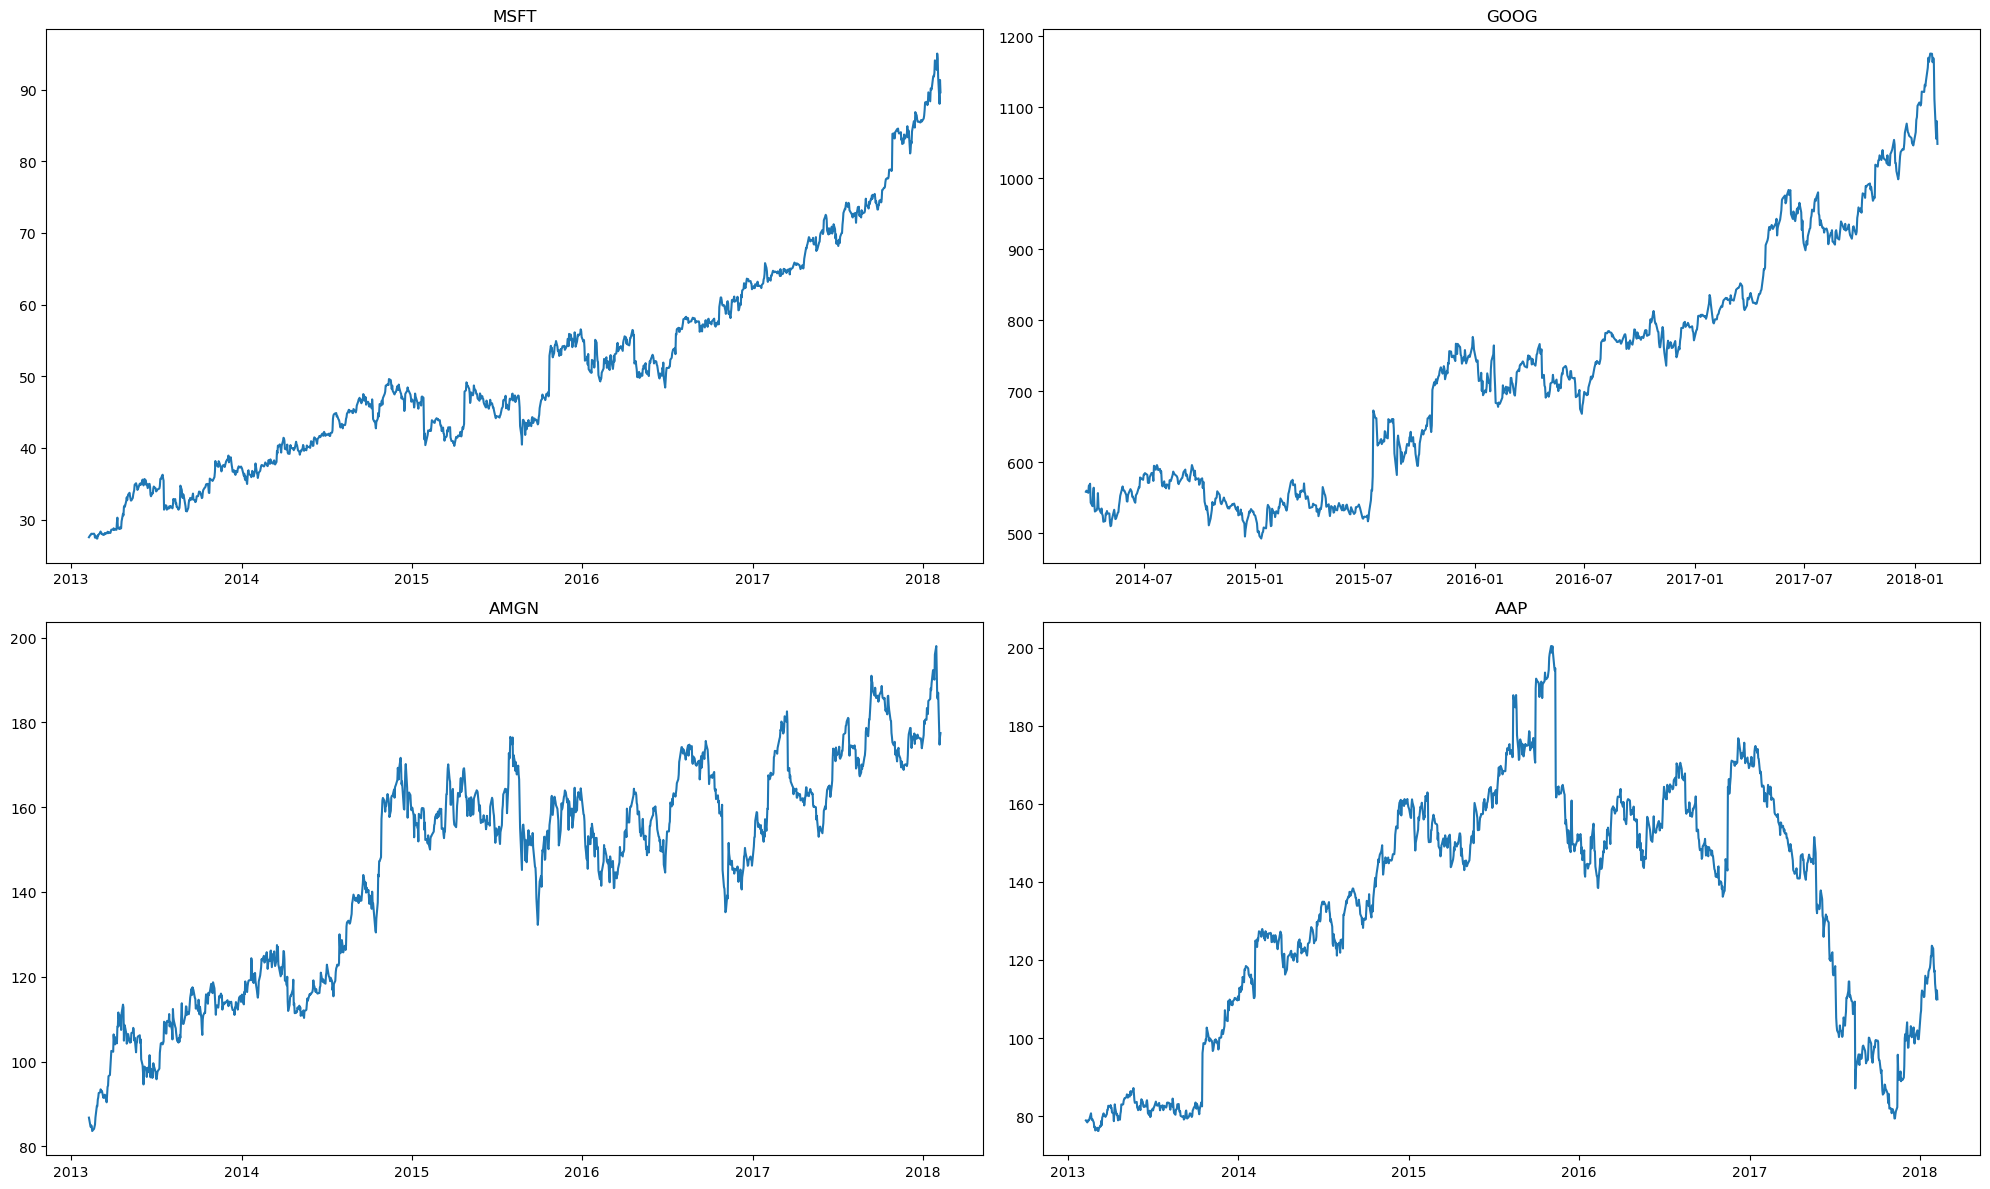

In [70]:
#Plotting Closing Price Trends with Subplots

plt.figure(figsize=(20,12))
for index, company in enumerate (tech_list,1):
    plt.subplot(2,2,index)
    filter1 = all_data['Name']==company
    df = all_data[filter1]
    plt.plot(df['date'],df['close'])
    plt.title(company)
    plt.tight_layout()

# .3 Analysing Moving Average of Various Stocks 

In [72]:
all_data.head(15)

,date,open,high,low,close,volume,Name
0,2013-02-08,27.3500,27.71,27.310,27.550,33318306,MSFT
1,2013-02-11,27.6500,27.92,27.500,27.860,32247549,MSFT
2,2013-02-12,27.8800,28.00,27.750,27.880,35990829,MSFT
3,2013-02-13,27.9300,28.11,27.880,28.030,41715530,MSFT
4,2013-02-14,27.9200,28.06,27.870,28.040,32663174,MSFT
5,2013-02-15,28.0400,28.16,27.875,28.010,49650538,MSFT
6,2013-02-19,27.8801,28.09,27.800,28.045,38804616,MSFT
7,2013-02-20,28.1300,28.20,27.830,27.870,44109412,MSFT
8,2013-02-21,27.7400,27.74,27.230,27.490,49078338,MSFT
9,2013-02-22,27.6800,27.76,27.480,27.760,31425726,MSFT


In [75]:
all_data['close'].rolling(window=10).mean().head(14)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9     27.8535
10    27.8355
11    27.7865
12    27.7795
13    27.7565
Name: close, dtype: float64

In [111]:
#Making new version of all_data as new_data instead of linking to old one. 
new_data = all_data.copy()

In [78]:
ma_day = [10, 20, 50]
for ma in ma_day:
    new_data['close' +str(ma)] = new_data['close'].rolling(ma).mean()

In [79]:
new_data

,date,open,high,low,close,volume,Name,close10,close20,close50
0,2013-02-08,27.35,27.7100,27.310,27.55,33318306,MSFT,NaN,NaN,NaN
1,2013-02-11,27.65,27.9200,27.500,27.86,32247549,MSFT,NaN,NaN,NaN
2,2013-02-12,27.88,28.0000,27.750,27.88,35990829,MSFT,NaN,NaN,NaN
3,2013-02-13,27.93,28.1100,27.880,28.03,41715530,MSFT,NaN,NaN,NaN
4,2013-02-14,27.92,28.0600,27.870,28.04,32663174,MSFT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4747,2018-02-01,116.24,118.8300,115.830,117.29,760629,AAP,119.614,116.2730,105.8292
4748,2018-02-02,115.92,117.1800,113.125,113.93,1092333,AAP,119.305,116.4195,106.2792
4749,2018-02-05,113.05,114.9700,109.810,109.86,1281592,AAP,118.488,116.3035,106.6978
4750,2018-02-06,108.28,113.1100,106.745,112.20,1240784,AAP,117.798,116.3440,107.1494


In [80]:
new_data.tail(7)

,date,open,high,low,close,volume,Name,close10,close20,close50
4745,2018-01-30,121.57,122.7000,117.575,119.27,1889671,AAP,119.274,115.2160,104.7390
4746,2018-01-31,119.86,120.4700,115.825,116.99,1235733,AAP,119.438,115.7610,105.2688
4747,2018-02-01,116.24,118.8300,115.830,117.29,760629,AAP,119.614,116.2730,105.8292
4748,2018-02-02,115.92,117.1800,113.125,113.93,1092333,AAP,119.305,116.4195,106.2792
4749,2018-02-05,113.05,114.9700,109.810,109.86,1281592,AAP,118.488,116.3035,106.6978
4750,2018-02-06,108.28,113.1100,106.745,112.20,1240784,AAP,117.798,116.3440,107.1494
4751,2018-02-07,112.09,114.5799,109.900,109.93,2163545,AAP,116.692,116.3160,107.5634


In [81]:
new_data.set_index('date', inplace=True)

In [82]:
new_data

,open,high,low,close,volume,Name,close10,close20,close50
date,,,,,,,,,
2013-02-08,27.35,27.7100,27.310,27.55,33318306,MSFT,NaN,NaN,NaN
2013-02-11,27.65,27.9200,27.500,27.86,32247549,MSFT,NaN,NaN,NaN
2013-02-12,27.88,28.0000,27.750,27.88,35990829,MSFT,NaN,NaN,NaN
2013-02-13,27.93,28.1100,27.880,28.03,41715530,MSFT,NaN,NaN,NaN
2013-02-14,27.92,28.0600,27.870,28.04,32663174,MSFT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2018-02-01,116.24,118.8300,115.830,117.29,760629,AAP,119.614,116.2730,105.8292
2018-02-02,115.92,117.1800,113.125,113.93,1092333,AAP,119.305,116.4195,106.2792
2018-02-05,113.05,114.9700,109.810,109.86,1281592,AAP,118.488,116.3035,106.6978


In [83]:
new_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close10', 'close20',
       'close50'],
      dtype='object')

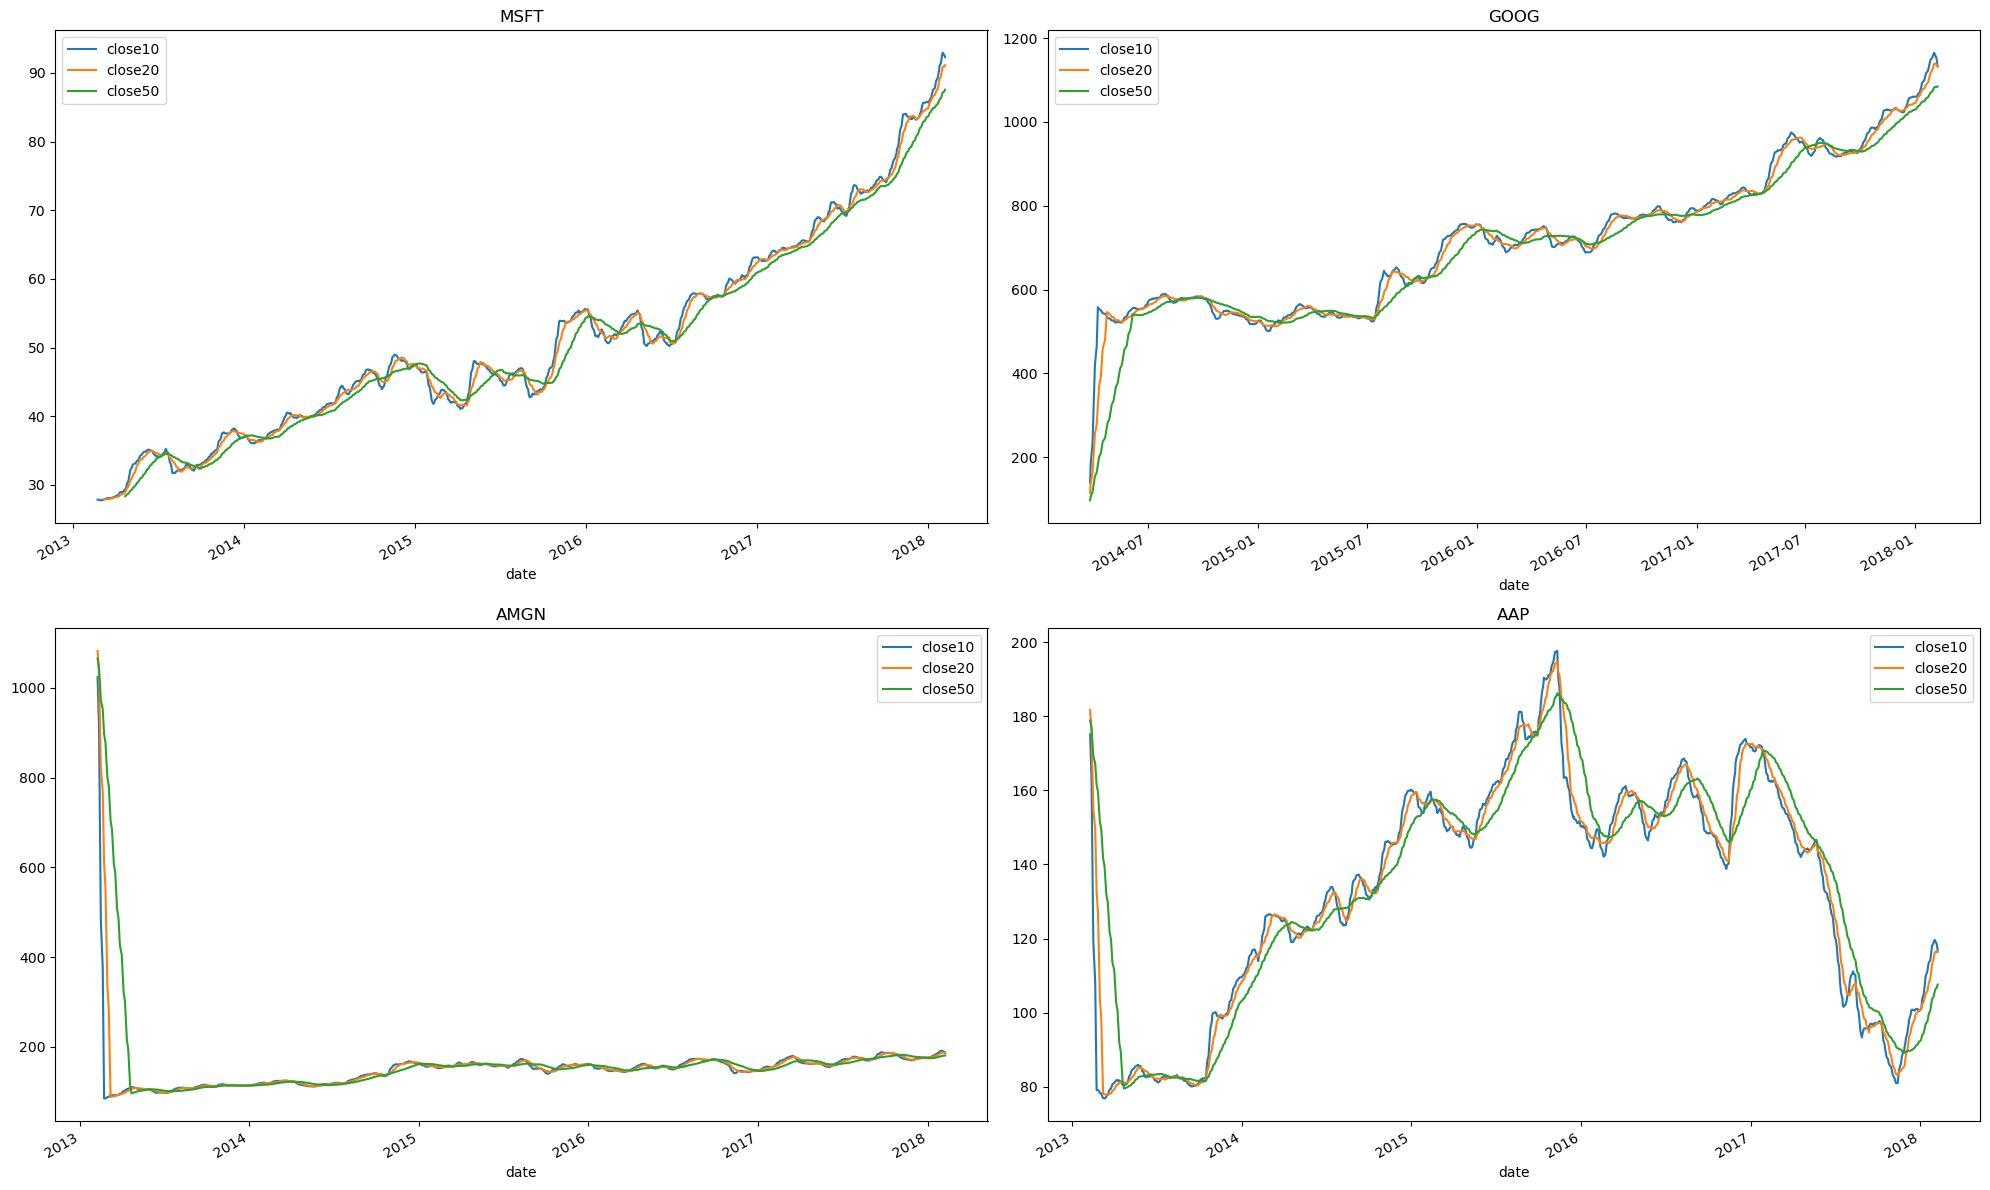

In [85]:
#using pandas line plot 
plt.figure(figsize=(20,12))
for index, company in enumerate (tech_list,1):
    plt.subplot(2,2,index)
    filter1 = new_data['Name']==company
    df = new_data[filter1]
    df[['close10', 'close20',
       'close50']].plot(ax=plt.gca())
    plt.title(company)
    plt.tight_layout()

# 4. Analysing closing Price change in apple stock 

In [88]:
company_list

['C:\\\\Users\\\\rocke\\\\Downloads\\\\S&P\\\\individual_stocks_5yr\\\\MSFT_data.csv',
 'C:\\\\Users\\\\rocke\\\\Downloads\\\\S&P\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'C:\\\\Users\\\\rocke\\\\Downloads\\\\S&P\\\\individual_stocks_5yr\\\\AMGN_data.csv',
 'C:\\\\Users\\\\rocke\\\\Downloads\\\\S&P\\\\individual_stocks_5yr\\\\AAP_data.csv']

In [90]:
apple = pd.read_csv(r'C:\\\\Users\\\\rocke\\\\Downloads\\\\S&P\\\\individual_stocks_5yr\\\\AAP_data.csv')

In [91]:
apple.head(5)

,date,open,high,low,close,volume,Name
0,2013-02-08,78.34,79.72,78.0100,78.90,1298137,AAP
1,2013-02-11,78.65,78.91,77.2300,78.39,758016,AAP
2,2013-02-12,78.39,78.63,77.5132,78.60,876859,AAP
3,2013-02-13,78.90,79.13,77.8500,78.97,1038574,AAP
4,2013-02-14,78.66,79.72,78.5850,78.84,1005376,AAP


In [102]:
apple['Daily Return(%)'] = apple['close'].pct_change() * 100

In [106]:
apple = apple.drop(columns=[
    'Daily return(in %)',
    'Daily return(%)'
])


In [107]:
apple.head(4)

,date,open,high,low,close,volume,Name,Daily Return(%)
0,2013-02-08,78.34,79.72,78.0100,78.90,1298137,AAP,NaN
1,2013-02-11,78.65,78.91,77.2300,78.39,758016,AAP,-0.646388
2,2013-02-12,78.39,78.63,77.5132,78.60,876859,AAP,0.267891
3,2013-02-13,78.90,79.13,77.8500,78.97,1038574,AAP,0.470738


In [108]:
import plotly.express as px 

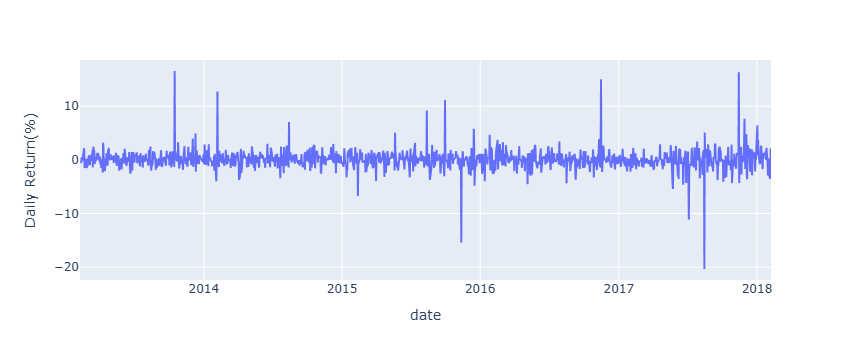

In [109]:
px.line(apple, x="date", y="Daily Return(%)")

# 5. Performing Resampling Analysis

In [112]:
apple.dtypes

date                object
open               float64
high               float64
low                float64
close              float64
volume               int64
Name                object
Daily Return(%)    float64
dtype: object

In [114]:
#Updating the date 
apple['date'] = pd.to_datetime(apple['date'])

In [115]:
apple.dtypes

date               datetime64[ns]
open                      float64
high                      float64
low                       float64
close                     float64
volume                      int64
Name                       object
Daily Return(%)           float64
dtype: object

In [116]:
apple.head(4)

,date,open,high,low,close,volume,Name,Daily Return(%)
0,2013-02-08,78.34,79.72,78.0100,78.90,1298137,AAP,NaN
1,2013-02-11,78.65,78.91,77.2300,78.39,758016,AAP,-0.646388
2,2013-02-12,78.39,78.63,77.5132,78.60,876859,AAP,0.267891
3,2013-02-13,78.90,79.13,77.8500,78.97,1038574,AAP,0.470738


In [118]:
#Making row index as a date 
apple.set_index('date', inplace=True)

In [119]:
apple.head(4)

,open,high,low,close,volume,Name,Daily Return(%)
date,,,,,,,
2013-02-08,78.34,79.72,78.0100,78.90,1298137,AAP,NaN
2013-02-11,78.65,78.91,77.2300,78.39,758016,AAP,-0.646388
2013-02-12,78.39,78.63,77.5132,78.60,876859,AAP,0.267891
2013-02-13,78.90,79.13,77.8500,78.97,1038574,AAP,0.470738


In [120]:
apple['close'].resample('M').mean()

date
2013-02-28     78.595714
2013-03-31     78.886500
2013-04-30     81.320909
2013-05-31     84.759091
2013-06-30     82.197000
                 ...    
2017-10-31     88.486364
2017-11-30     87.506190
2017-12-31    100.499500
2018-01-31    115.300476
2018-02-28    112.642000
Freq: ME, Name: close, Length: 61, dtype: float64

<Axes: xlabel='date'>

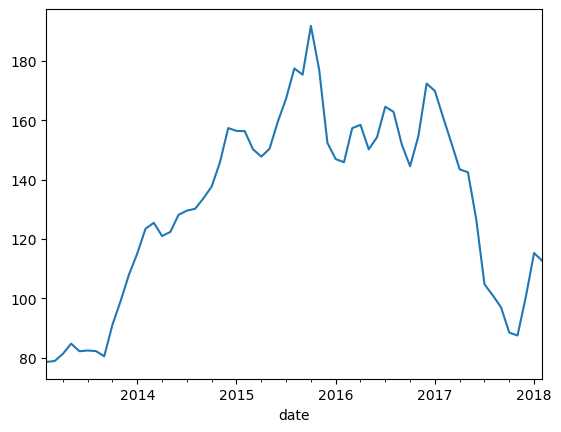

In [124]:
#Resampling Monthly Basis
apple['close'].resample('M').mean().plot()

In [126]:

apple['close'].resample('Y').mean()

date
2013-12-31     86.547699
2014-12-31    130.955000
2015-12-31    163.647262
2016-12-31    155.487937
2017-12-31    122.576494
2018-12-31    114.789231
Freq: YE-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

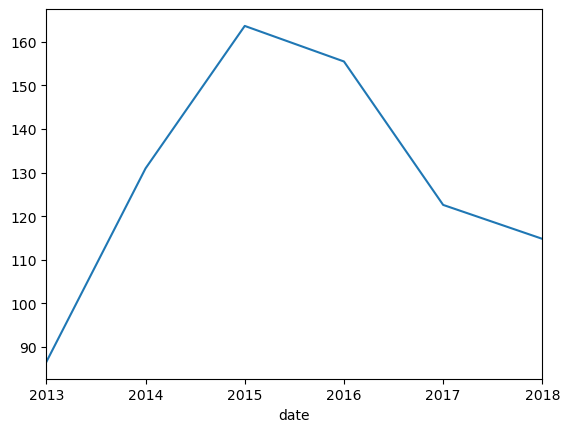

In [132]:
#Resampling Yearly Basis
apple['close'].resample('Y').mean().plot()

In [133]:
apple['close'].resample('Q').mean()

date
2013-03-31     78.766765
2013-06-30     82.776562
2013-09-30     81.765000
2013-12-31     99.235156
2014-03-31    121.316066
2014-06-30    123.882381
2014-09-30    131.146094
2014-12-31    146.913125
2015-03-31    154.200492
2015-06-30    152.742698
2015-09-30    173.328906
2015-12-31    173.703750
2016-03-31    150.372951
2016-06-30    154.356250
2016-09-30    159.801719
2016-12-31    157.207937
2017-03-31    160.695000
2017-06-30    137.295238
2017-09-30    100.947460
2017-12-31     91.973333
2018-03-31    114.789231
Freq: QE-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

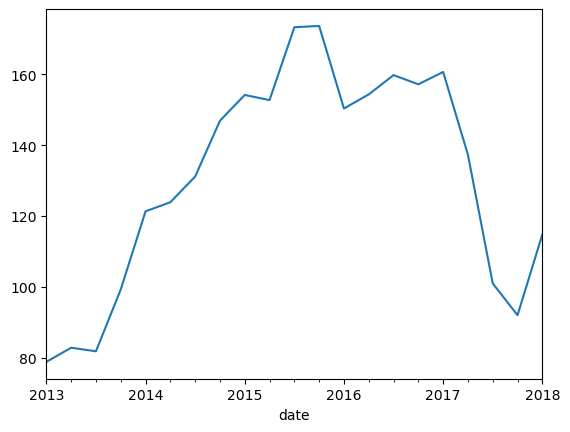

In [136]:
# Resampling Quarterly Basis
apple['close'].resample('Q').mean().plot()

# 6. Perform Multi-Variate Analysis to Understand Correlation

In [158]:
company_list

['C:\\\\Users\\\\rocke\\\\Downloads\\\\S&P\\\\individual_stocks_5yr\\\\MSFT_data.csv',
 'C:\\\\Users\\\\rocke\\\\Downloads\\\\S&P\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'C:\\\\Users\\\\rocke\\\\Downloads\\\\S&P\\\\individual_stocks_5yr\\\\AMGN_data.csv',
 'C:\\\\Users\\\\rocke\\\\Downloads\\\\S&P\\\\individual_stocks_5yr\\\\AAP_data.csv']

In [159]:
msft = pd.read_csv(company_list[0])
amzn = pd.read_csv(company_list[1])
google = pd.read_csv(company_list[2])
app = pd.read_csv(company_list[3])

In [147]:
closing_price = pd.DataFrame()

In [177]:
closing_price['msft_close'] = msft['close']
closing_price['amzn_close'] = amzn['close']
closing_price['google_close'] = google['close']
closing_price['app_close'] = app['close']

In [179]:
closing_price

,amzn_close,google_close,msft_close,app_close
2,556.97,84.540,27.880,78.60
3,567.16,84.940,28.030,78.97
4,567.00,84.720,28.040,78.84
5,569.74,83.610,28.010,79.00
6,543.14,84.131,28.045,80.72
...,...,...,...,...
1252,NaN,191.270,92.740,119.27
1253,NaN,186.050,95.010,116.99
1254,NaN,185.560,94.260,117.29
1255,NaN,187.010,91.780,113.93


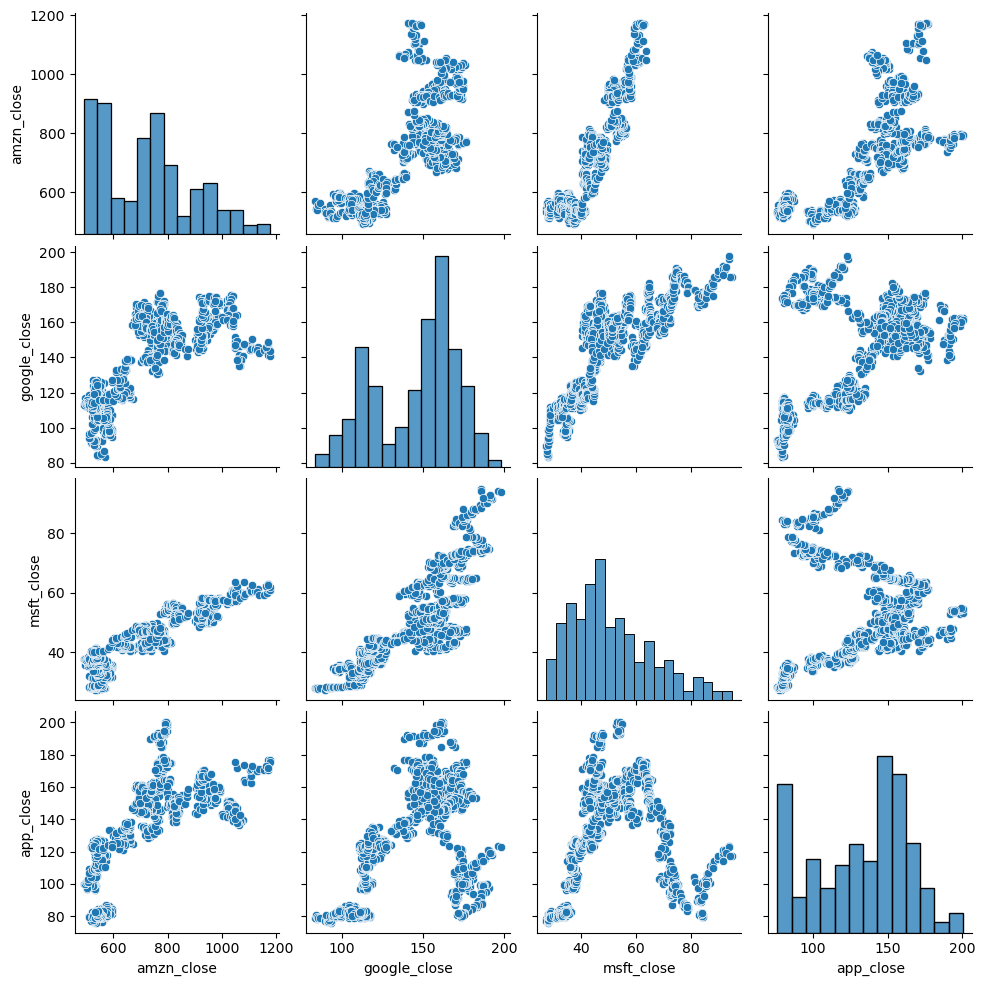

In [180]:
sns.pairplot(closing_price)

In [181]:
closing_price.corr()

,amzn_close,google_close,msft_close,app_close
amzn_close,1.000000,0.751817,0.907485,0.718214
google_close,0.751817,1.000000,0.816800,0.499044
msft_close,0.907485,0.816800,1.000000,0.150637
app_close,0.718214,0.499044,0.150637,1.000000


<Axes: >

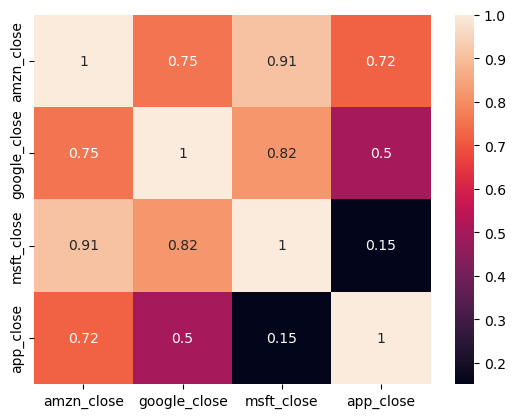

In [182]:
sns.heatmap(closing_price.corr(), annot=True)

# 7. Performing Correlation Analysis

In [184]:
closing_price

,amzn_close,google_close,msft_close,app_close
2,556.97,84.540,27.880,78.60
3,567.16,84.940,28.030,78.97
4,567.00,84.720,28.040,78.84
5,569.74,83.610,28.010,79.00
6,543.14,84.131,28.045,80.72
...,...,...,...,...
1252,NaN,191.270,92.740,119.27
1253,NaN,186.050,95.010,116.99
1254,NaN,185.560,94.260,117.29
1255,NaN,187.010,91.780,113.93


In [188]:
closing_price['app_close'].shift(1)

2          NaN
3        78.60
4        78.97
5        78.84
6        79.00
         ...  
1252    122.89
1253    119.27
1254    116.99
1255    117.29
1256    113.93
Name: app_close, Length: 1255, dtype: float64

In [191]:
(closing_price['app_close'] - closing_price['app_close'].shift(1))/closing_price['app_close'].shift(1)*100

2            NaN
3       0.470738
4      -0.164619
5       0.202943
6       2.177215
          ...   
1252   -2.945724
1253   -1.911629
1254    0.256432
1255   -2.864694
1256   -3.572369
Name: app_close, Length: 1255, dtype: float64

In [194]:
for col in closing_price.columns:
    closing_price[col + '_pct_change'] = (closing_price[col] - closing_price[col].shift(1))/closing_price[col].shift(1)*100
    

In [196]:
closing_price.columns

Index(['amzn_close', 'google_close', 'msft_close', 'app_close',
       'amzn_close_pct_change', 'google_close_pct_change',
       'msft_close_pct_change', 'app_close_pct_change'],
      dtype='object')

In [198]:
closing_p = closing_price[['amzn_close_pct_change', 'google_close_pct_change',
       'msft_close_pct_change', 'app_close_pct_change']]

In [199]:
closing_p

,amzn_close_pct_change,google_close_pct_change,msft_close_pct_change,app_close_pct_change
2,NaN,NaN,NaN,NaN
3,1.829542,0.473149,0.538020,0.470738
4,-0.028211,-0.259006,0.035676,-0.164619
5,0.483245,-1.310198,-0.106990,0.202943
6,-4.668796,0.623131,0.124955,2.177215
...,...,...,...,...
1252,NaN,-3.398990,-1.256388,-2.945724
1253,NaN,-2.729126,2.447703,-1.911629
1254,NaN,-0.263370,-0.789391,0.256432
1255,NaN,0.781418,-2.631021,-2.864694


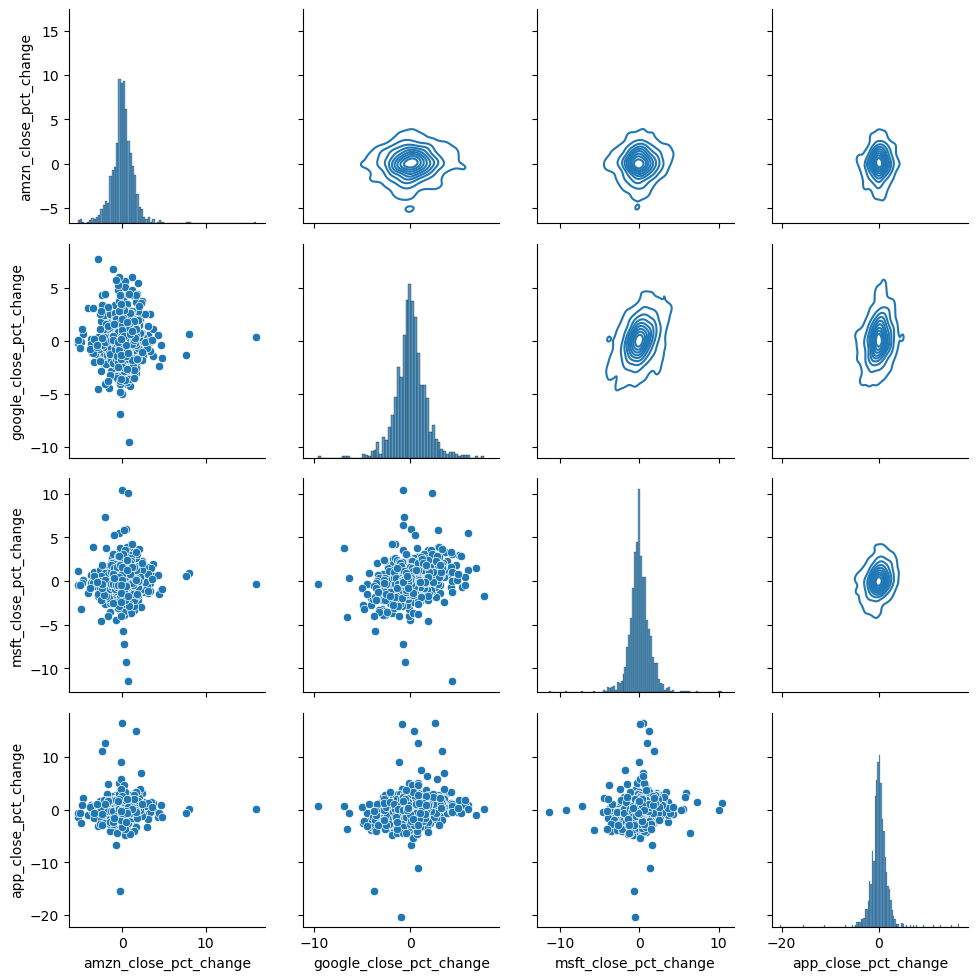

In [203]:
g = sns.PairGrid(data= closing_p)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [204]:
closing_p.corr()

,amzn_close_pct_change,google_close_pct_change,msft_close_pct_change,app_close_pct_change
amzn_close_pct_change,1.000000,0.027473,0.038846,0.039004
google_close_pct_change,0.027473,1.000000,0.293235,0.224374
msft_close_pct_change,0.038846,0.293235,1.000000,0.163326
app_close_pct_change,0.039004,0.224374,0.163326,1.000000


<Axes: >

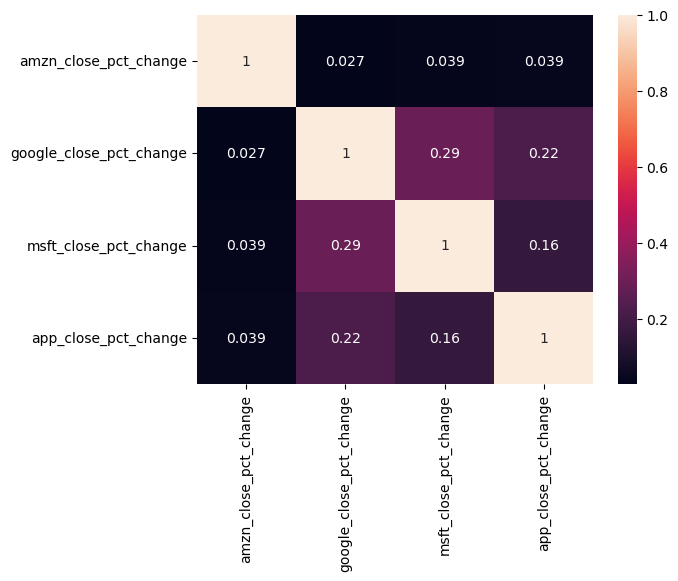

In [205]:
sns.heatmap(closing_p.corr(), annot=True)